# Binomial Distribution

In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p). A single success/failure experiment is also called a Bernoulli trial or Bernoulli experiment, and a sequence of outcomes is called a Bernoulli process; for a single trial, i.e., n = 1, the binomial distribution is a Bernoulli distribution. The binomial distribution is the basis for the popular binomial test of statistical significance.

## Bernoulli trial

Lets say you have a fair coin and you toss it, the act of tossing an seeing the result as $Heads$ or $Tails$ is considered a bernoulli trail. Lets say you toss the coin 4 times then we say its a bernoulli expriment with $n=4$ trails. Also we said we are considering a fair coin which means the chances of getting $Heads$ or $Tails$ is equally likely. Let's capture this coin fairness as $p$. $p=0.5$ represents both $Heads$ or $Tails$ have 50% chance of occurrence. If $p=0.2$ then we sau $Heads$ has 20% chance of occurrence and $Tails$ has $1-p$ ie 0.8 or 80% chance of occurrence.

We represent all of this programatically as follows.

In [73]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [74]:
bernoulli_trial = lambda p: random.choices(['H', 'T'], weights=[p, 1-p])

def run_a_bernoulli_experiment(N=4, p=0.5):
    data = {}
    for n in range(1, N+1):
        result = bernoulli_trial(p=0.5)
        data[f't_{n}'] = result
    return pd.DataFrame(data)

results = run_a_bernoulli_experiment(N=4, p=0.5)
print(results)

  t_1 t_2 t_3 t_4
0   H   T   T   T


What we did above is that we conducted one bernoulli expriment with $N=4$ trials. Now, Let's ask a question, if I run a bernoulli trial with $N=4$ or $N=5$ what are the odds of getting all $Heads$ or what are the odds of getting two $Heads$ and three $Tails$? 

In genral If I run a bernoulli $N$ trials, what are the odds of seeing $k$ $Heads$ and $N-K$ $Tails$ ?

To purse an answer for this question, Let's run five bernoulli experiments.

In [75]:
num_exp = 5
outcomes = []
for i in range(0, num_exp):
    outcomes.append(run_a_bernoulli_experiment(N=4, p=0.5))
res = results.append(outcomes, ignore_index=True)
print(res)

  t_1 t_2 t_3 t_4
0   H   T   T   T
1   H   H   H   T
2   T   T   H   H
3   H   T   H   T
4   T   T   T   H
5   T   H   T   T


We can see at each trail the number of $Heads$ and $Tails$ keep changing and this is conditioned on the fairness of coin $p$ if the coin was biased to $Heads$ ie. $p > (1-p)$ then we would have seen more $Heads$ count than tails. 

In [76]:
bernoulli_trial = lambda p: random.choices(['H', 'T'], weights=[p, 1-p])

def run_a_bernoulli_experiment(n=4, p=0.5):
    data = {}
    count = {'H': 0, 'T': 0}
    for trial in range(1, n+1):
        result = bernoulli_trial(p=0.5)
        count[result[0]] += 1
        data[f't_{trial}'] = result
    data[f'H_count'] = count['H']
    data[f'T_count'] = count['T']
    return pd.DataFrame(data)

def run_bernoulli_experiments(num_of_exp=1, n=4, p=0.5):
    results = None
    outcomes = []
    for i in range(0, num_exp):
        if i == 0:
            results = run_a_bernoulli_experiment(n=4, p=0.5)
        else:
            outcomes.append(run_a_bernoulli_experiment(n=4, p=0.5))
    return results.append(outcomes, ignore_index=True)

In [77]:
outcomes = run_bernoulli_experiments(num_of_exp=1, n=4, p=0.5)
print(outcomes)

  t_1 t_2 t_3 t_4  H_count  T_count
0   H   T   H   H        3        1
1   H   T   H   T        2        2
2   H   H   T   H        3        1
3   T   H   H   H        3        1
4   H   T   T   T        1        3


Now lets visit the original question back, If I run a bernoulli trial with $N=5$ what are the odds of getting all $4 Heads$ and $ 1Tails$? To answer this, I will list all possible scenerios the outcomes can be. If $N=5$, then we can have $0 Heads$, $5 Tails$ as an outcome, or $1 Heads$, $4 Tails$ as an outcome or $2 Heads$, $3 Tails$ or.. $5 Heads$, $0 Tails$

| id | Hcount | Tcount | TOTAL N = 5 | Combinations ${}^{5}C_{Hcount}$
| --- | --- | --- | --- | --- |
| id_0 | 0 | 5 | 5 | ${}^{5}C_{0}$ = 1
| id_1 | 1 | 4 | 5 | ${}^{5}C_{1}$ = 5
| id_2 | 2 | 3 | 5 | ${}^{5}C_{2}$ = 10
| id_3 | 3 | 2 | 5 | ${}^{5}C_{3}$ = 10
| id_4 | 4 | 1 | 5 | ${}^{5}C_{4}$ = 5
| id_5 | 5 | 0 | 5 | ${}^{5}C_{5}$ = 1

out of all the above outcomes we are interested in the id_4 ie. $4 Heads$ and $ 1Tails$ and there are only ways it can occor. Here are all the outcomes for the case 4 heads and 1 tails.

| Tails 1| Tails 2| Tails 3| Tails 4| Tails 5|
| --- | --- | --- | --- | --- |
| H | H | H | H | T |
| H | H | H | T | H |
| H | H | T | H | H |
| H | T | H | H | H |
| T | H | H | H | H |

Note all the above tables are independent of the coin's bias. Now, if I say that the coin has probablitity of giving head as a result of 0.8 then we can re write the above the table as this.

| Tails 1| Tails 2| Tails 3| Tails 4| Tails 5| Probablity of this sequence of event
| --- | --- | --- | --- | --- | --- |
| 0.8 | 0.8 | 0.8 | 0.8 | 0.2 | 0.8192 |
| 0.8 | 0.8 | 0.8 | 0.2 | 0.8 | 0.8192 |
| 0.8 | 0.8 | 0.2 | 0.8 | 0.8 | 0.8192 |
| 0.8 | 0.2 | 0.8 | 0.8 | 0.8 | 0.8192 |
| 0.2 | 0.8 | 0.8 | 0.8 | 0.8 | 0.8192 |

Or, we can re write the above table with a formula

| Tails 1| Tails 2| Tails 3| Tails 4| Tails 5| $p^k$ x $q^{n-k}$|
| --- | --- | --- | --- | --- | --- |
| 0.8 | 0.8 | 0.8 | 0.8 | 0.2 | 0.8192 |
| 0.8 | 0.8 | 0.8 | 0.2 | 0.8 | 0.8192 |
| 0.8 | 0.8 | 0.2 | 0.8 | 0.8 | 0.8192 |
| 0.8 | 0.2 | 0.8 | 0.8 | 0.8 | 0.8192 |
| 0.2 | 0.8 | 0.8 | 0.8 | 0.8 | 0.8192 |


Now we can combine this with our original table

| id | Hcount | Tcount | TOTAL N = 5 | Combinations| ${}^{5}C_{k}$ x $p^k$ x $q^{n-k}$|
| --- | --- | --- | --- | --- | --- |
| id_0 | 0 | 5 | 5 | ${}^{5}C_{0}$ = 1 | 0.00032|
| id_1 | 1 | 4 | 5 | ${}^{5}C_{1}$ = 5 | 0.064|
| id_2 | 2 | 3 | 5 | ${}^{5}C_{2}$ = 10 | 0.0512|
| id_3 | 3 | 2 | 5 | ${}^{5}C_{3}$ = 10 | 0.2048|
| id_4 | 4 | 1 | 5 | ${}^{5}C_{4}$ = 5 | 0.4092|
| id_5 | 5 | 0 | 5 | ${}^{5}C_{5}$ = 1 | 0.32768|

We will run the run_bernoulli_experiments as we did above and lets fill this table the actual outcomes from experiment.

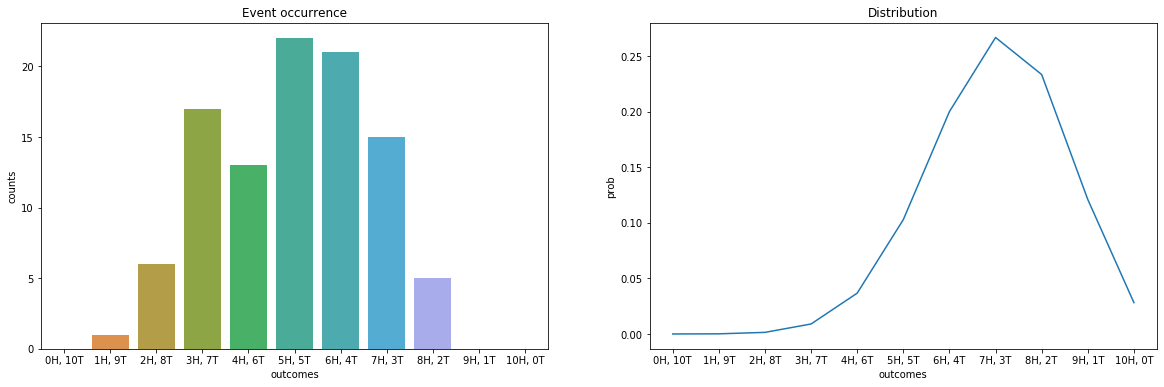

In [103]:
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

class BernoulliDistribution:
    def __init__(self, n=4):
        self.n = n
        self.num_of_exp = 0
        self.p = 0
    
    def run_a_bernoulli_experiment(self, p=0.5):
        bernoulli_trial = lambda p: random.choices(['H', 'T'], weights=[p, 1-p])
        
        data = {}
        count = {'H': 0, 'T': 0}
        for trial in range(0, self.n):
            result = bernoulli_trial(p=0.5)
            count[result[0]] += 1
            data[f't_{trial+1}'] = result
        data[f'H_count'] = count['H']
        data[f'T_count'] = count['T']
        data[f'n'] = count['H'] + count['T']
        data['outcome'] = f"{count['H']}H,{count['T']}T"
        
        return pd.DataFrame(data)
    
    def get_outcomes_count(self, outcomes):
        counts = {}
        # Initialize count distribution
        for i in range(0, self.n+1):
            counts[f'{i}H, {self.n-i}T'] = 0
            
        # count distribution
        for i in range(len(outcomes)):
            counts[f'{outcomes.iloc[i].H_count}H, {outcomes.iloc[i].T_count}T'] += 1
        
        _outcomes = []
        _counts = []
        _event_probablity = []
        _probablities = []
        _cp = []
        _ncr = []
        head_count = 0
        tail_count = self.n
        for key, value in counts.items():
            _outcomes.append(key)
            _counts.append(value)
            _event_probablity.append(value/self.num_of_exp)
            binomial_prob = nCr(self.n, head_count) * (self.p ** head_count) * ((1-self.p) ** tail_count)
            #binomial_prob = binomial_prob / math.pow(2, self.n)
            _probablities.append(binomial_prob)
            _cp.append(nCr(self.n, head_count)/math.pow(2, self.n))
            _ncr.append(nCr(self.n, head_count))
            head_count += 1
            tail_count = self.n - head_count
        res = {'outcomes': _outcomes, 
               'counts': _counts,
               'counts/total_exp': _event_probablity,
               'nCr': _ncr,
               'nCr/2^n': _cp,
               'prob': _probablities}
        return pd.DataFrame(res)
    
    def plot_distribution(self, outcomes):
        # sns.histplot(outcomes, x='outcome')
        distribution = bd.get_outcomes_count(outcomes)
        fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=False, sharex=False)
        axes[0].set_title('Event occurrence')
        axes[1].set_title('Distribution')
        sns.barplot(x="outcomes", y="counts", data=distribution, ax=axes[0])
        sns.lineplot(x="outcomes", y="prob", data=distribution, ax=axes[1])
        return distribution
        
    
    def run_bernoulli_experiments(self, num_of_exp=1, p=0.5):
        results = None
        self.num_of_exp = num_of_exp
        self.p = p
        outcomes = []
        for i in range(0, num_of_exp):
            # print(f'Running experiment {i} with {self.n} trails')
            if i == 0:
                results = self.run_a_bernoulli_experiment(p)
            else:
                outcomes.append(self.run_a_bernoulli_experiment(p))
        return results.append(outcomes, ignore_index=True)
        
bd = BernoulliDistribution(n=10)
outcomes = bd.run_bernoulli_experiments(num_of_exp=100, p=0.7)
distribution = bd.plot_distribution(outcomes)

In [104]:
print(distribution)

   outcomes  counts  counts/total_exp    nCr   nCr/2^n      prob
0   0H, 10T       0              0.00    1.0  0.000977  0.000006
1    1H, 9T       1              0.01   10.0  0.009766  0.000138
2    2H, 8T       6              0.06   45.0  0.043945  0.001447
3    3H, 7T      17              0.17  120.0  0.117188  0.009002
4    4H, 6T      13              0.13  210.0  0.205078  0.036757
5    5H, 5T      22              0.22  252.0  0.246094  0.102919
6    6H, 4T      21              0.21  210.0  0.205078  0.200121
7    7H, 3T      15              0.15  120.0  0.117188  0.266828
8    8H, 2T       5              0.05   45.0  0.043945  0.233474
9    9H, 1T       0              0.00   10.0  0.009766  0.121061
10  10H, 0T       0              0.00    1.0  0.000977  0.028248


In [105]:
print(sum(distribution['counts/total_exp']))
print(sum(distribution['nCr/2^n']))
print(sum(distribution.prob))

1.0
1.0
0.9999999999999999


We can see that nCr captures number of ways a sequence can happen and $2^n$ canptures all the possible sequences and experimentally counts/total_exp is almost same as $nCr/2^n$. 

# Conclusion 




So, for a sequence of n trials where each trail has a probablity of p for a preferred occorances. We can write the probablity as 

\begin{equation*}
{}^{n}C_k * p^k * (1-p)^{n-k}
\end{equation*}